# Practice Assignment

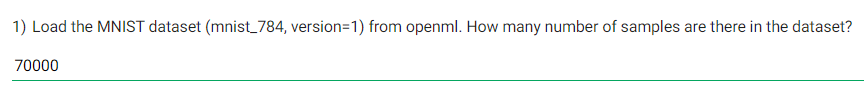

In [ ]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml(name='mnist_784', version=1, return_X_y=True)
print(X.shape[0])

70000


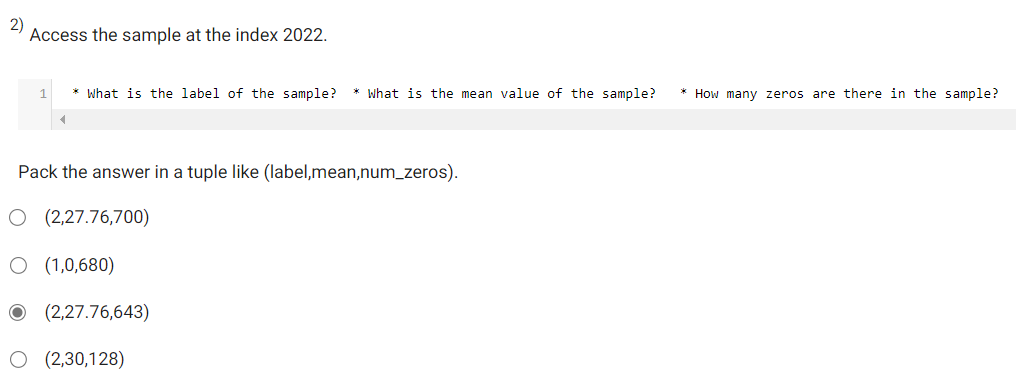

In [ ]:
y[2022], X.iloc[2022,:].mean(), (X.iloc[2022,:]==0).sum()

('2', 27.761479591836736, 643)

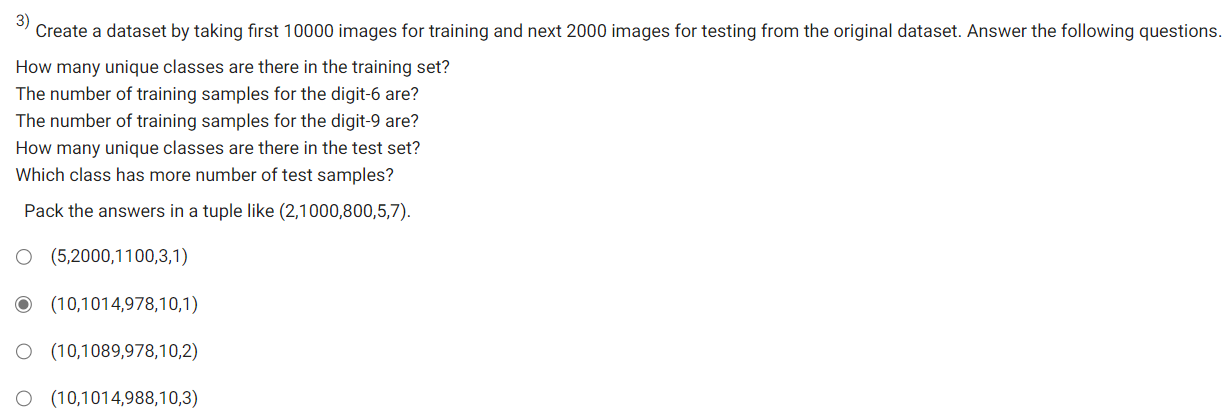

In [ ]:
y_train, y_test = y[:10000],y[10000:12000]
len(y_train.unique()), (y_train=='6').sum(), (y_train=='9').sum(), len(y_test.unique()), y_train.mode()[0]

(10, 1014, 978, 10, '1')

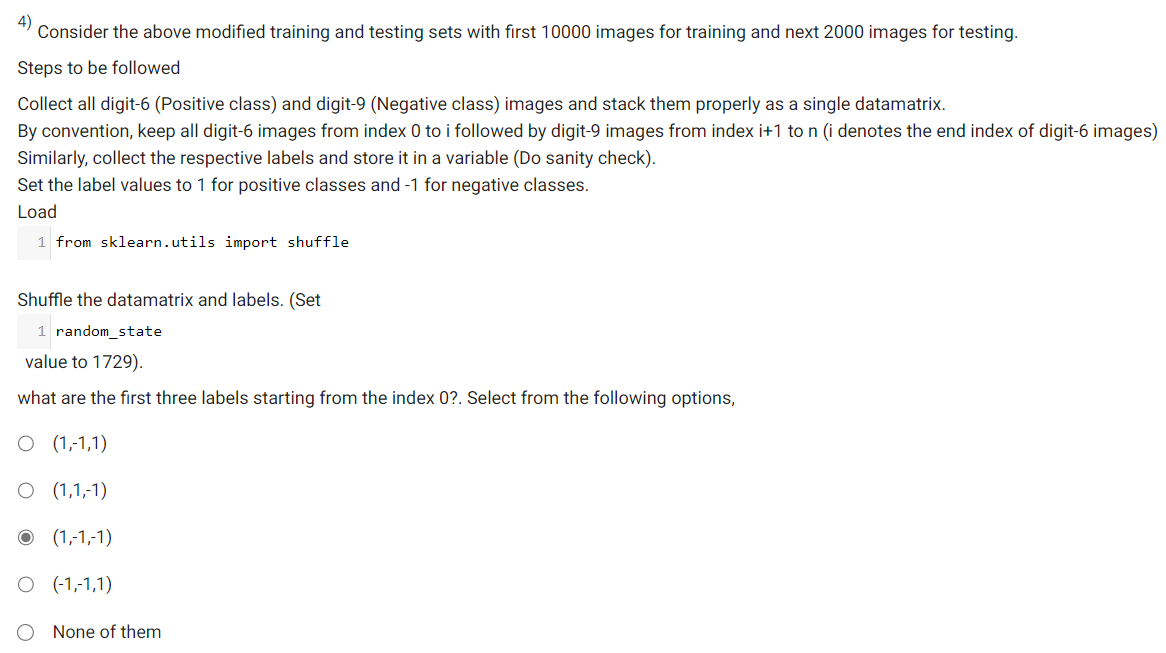

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

X_new, y_new = X,y
X_train, X_test, y_train, y_test = X_new[:10000],X_new[10000:12000],y_new[:10000],y_new[10000:12000]

six_labels_train = y_train=='6'
nine_labels_train = y_train=='9'
six_labels_test = y_test=='6'
nine_labels_test = y_test=='9'

X69 = pd.concat([X_train[six_labels_train],X_train[nine_labels_train]])
y69 = np.concatenate([np.ones(X_train[six_labels_train].shape[0]),-1*np.ones(X_train[nine_labels_train].shape[0])], axis=0)

X_final, y_final = shuffle(X69,y69,random_state=1729)
y_final[:3]

array([ 1., -1., -1.])

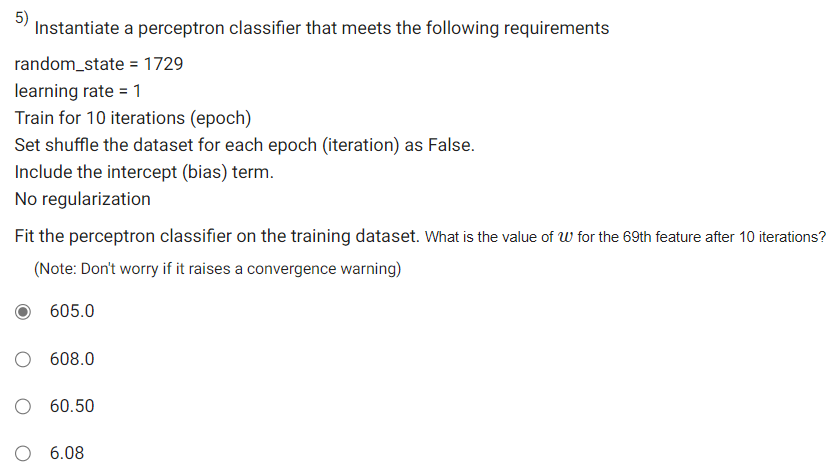

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron(eta0=1,random_state=1729,max_iter=10,shuffle=False)
p.fit(X_final, y_final)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Perceptron(eta0=1, max_iter=10, random_state=1729, shuffle=False)

In [ ]:
p.coef_[:,69:70]

array([[605.]])

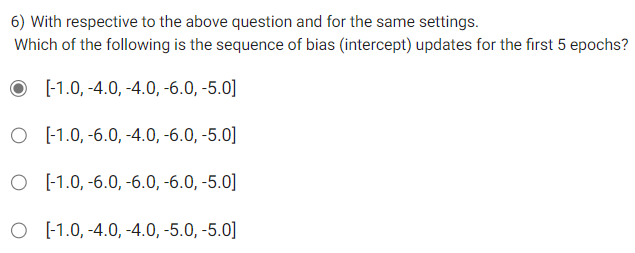

In [ ]:
for i in range(1,6):
  p = Perceptron(eta0=1,random_state=1729,max_iter=i,shuffle=False)
  p.fit(X_final, y_final)
  print(p.intercept_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[-1.]
[-4.]
[-4.]
[-6.]
[-5.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


# Graded Assignment

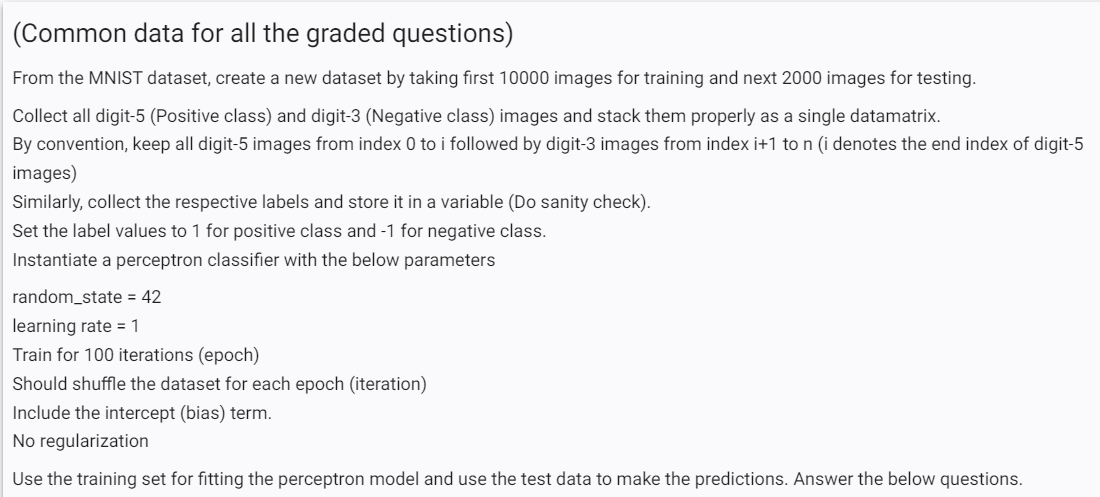

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X,y = fetch_openml(name='mnist_784', version=1, return_X_y=True)

X_new,y_new = X[:12000],y[:12000]
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,shuffle=False,test_size=2000)
five_train = y_train=='5'
three_train = y_train=='3'
five_test = y_test=='5'
three_test = y_test=='3'
X_train_new = pd.concat((X_train[five_train],X_train[three_train]))
X_test_new = pd.concat((X_test[five_test],X_test[three_test]))
y_train_new = np.where(pd.concat((y_train[five_train],y_train[three_train]))=='5',1,-1)
y_test_new = np.where(pd.concat((y_test[five_test],y_test[three_test]))=='5',1,-1)

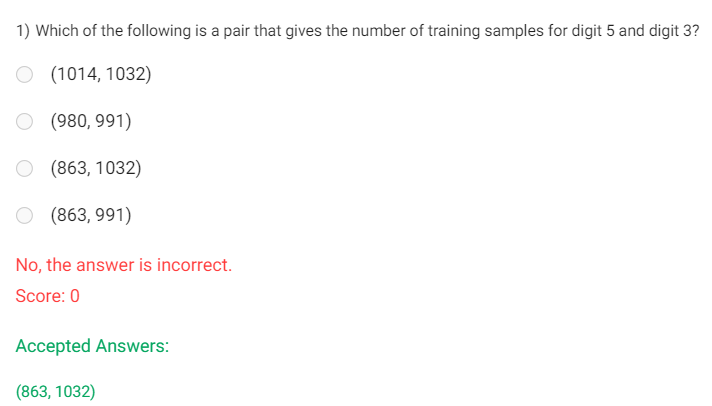

In [2]:
np.unique(y_train_new, return_counts=True)

(array([-1,  1]), array([1032,  863]))

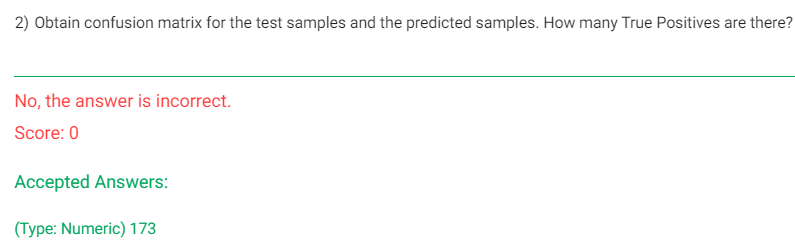

In [3]:
from sklearn.linear_model import Perceptron
p = Perceptron(eta0=1, random_state=42, max_iter=100, shuffle=True)
p.fit(X_train_new,y_train_new)

Perceptron(eta0=1, max_iter=100, random_state=42)

In [4]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_new,p.predict(X_test_new))
cm[1][1]

173

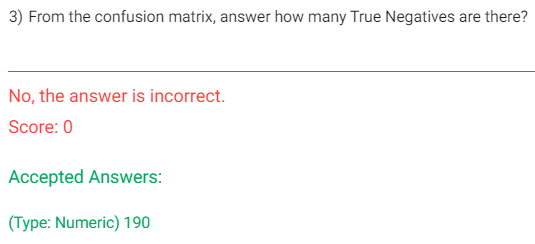

In [5]:
cm[0][0]

190

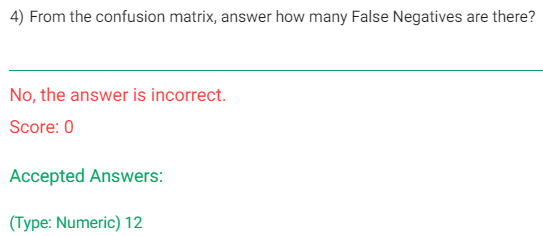

In [6]:
cm[1][0]

12

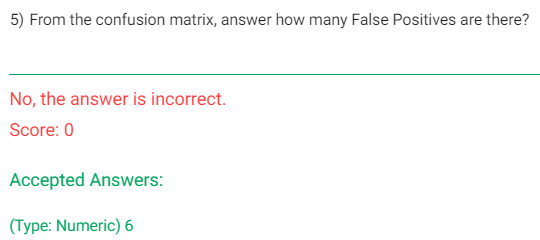

In [7]:
cm[0][1]

6

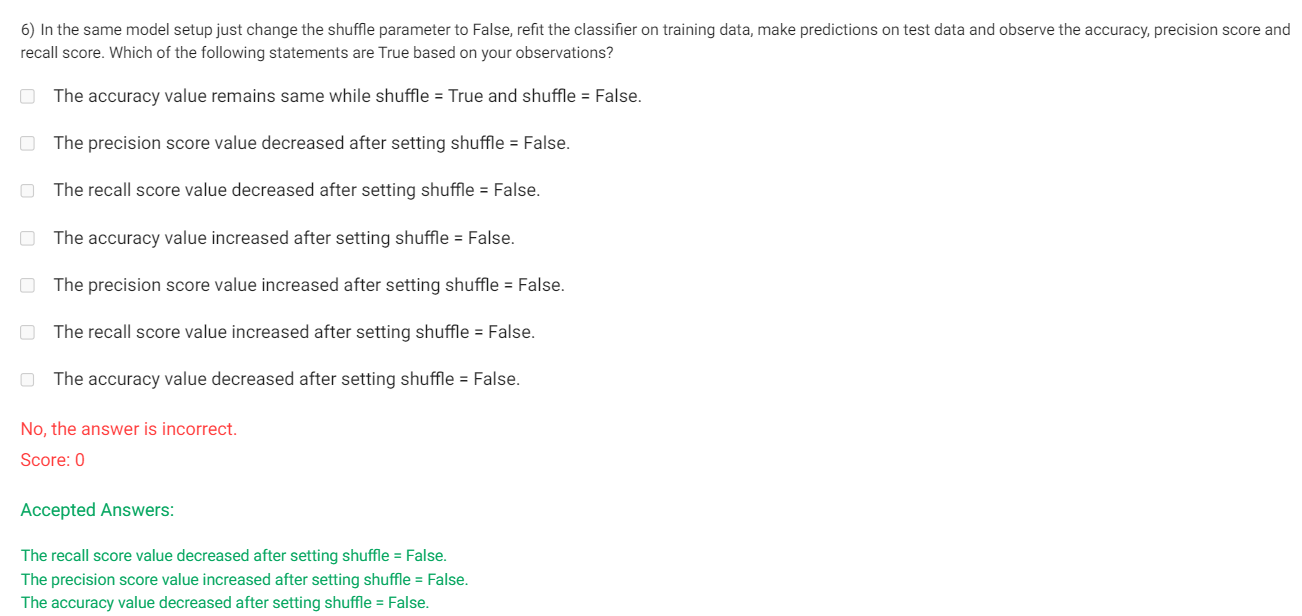

In [8]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score
p_shuffle_true = Perceptron(eta0=1, random_state=42, max_iter=100, shuffle=True)
p_shuffle_false = Perceptron(eta0=1, random_state=42, max_iter=100, shuffle=False)
p_shuffle_true.fit(X_train_new,y_train_new)
p_shuffle_false.fit(X_train_new,y_train_new)
print('accuracy_score:',accuracy_score(y_test_new,p_shuffle_true.predict(X_test_new)), accuracy_score(y_test_new,p_shuffle_false.predict(X_test_new)))
print('precision_score:',precision_score(y_test_new,p_shuffle_true.predict(X_test_new)),precision_score(y_test_new,p_shuffle_false.predict(X_test_new)))
print('recall_score:',recall_score(y_test_new,p_shuffle_true.predict(X_test_new)), recall_score(y_test_new,p_shuffle_false.predict(X_test_new)))

accuracy_score: 0.952755905511811 0.5485564304461942
precision_score: 0.9664804469273743 1.0
recall_score: 0.9351351351351351 0.07027027027027027


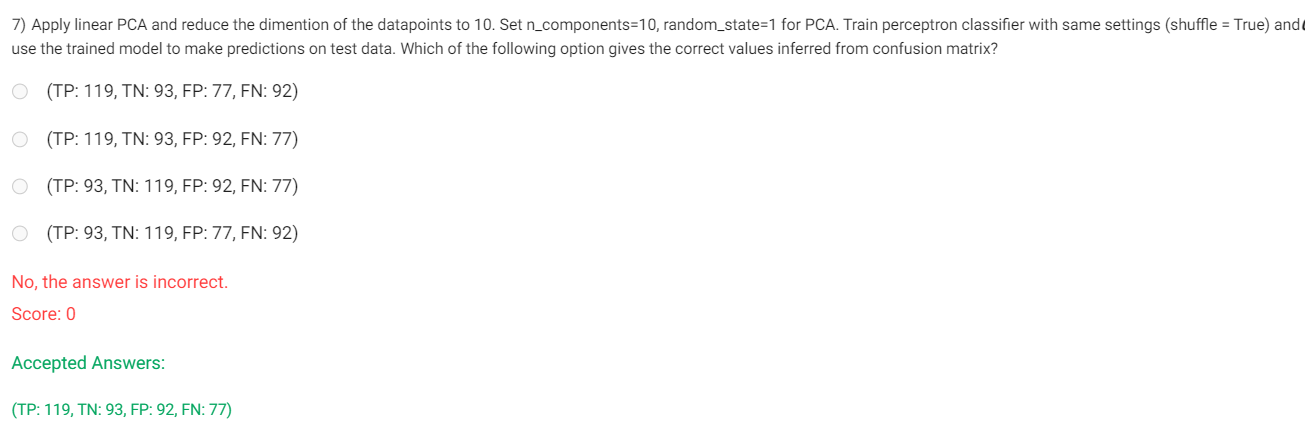

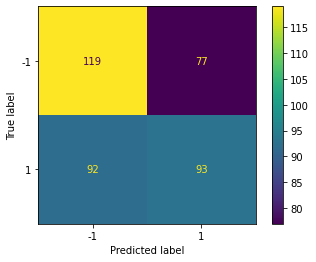

In [12]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay

pca = PCA(n_components=10,random_state=1)
X_train_pca = pca.fit(X_train_new).transform(X_train_new)
X_test_pca = pca.fit(X_test_new).transform(X_test_new)

pca = Perceptron(eta0=1, random_state=42, max_iter=100,fit_intercept=True,
                 validation_fraction=0.1, shuffle=True, penalty=None)
pca.fit(X_train_pca,y_train_new)

ConfusionMatrixDisplay.from_predictions(y_test_new,pca.predict(X_test_pca))

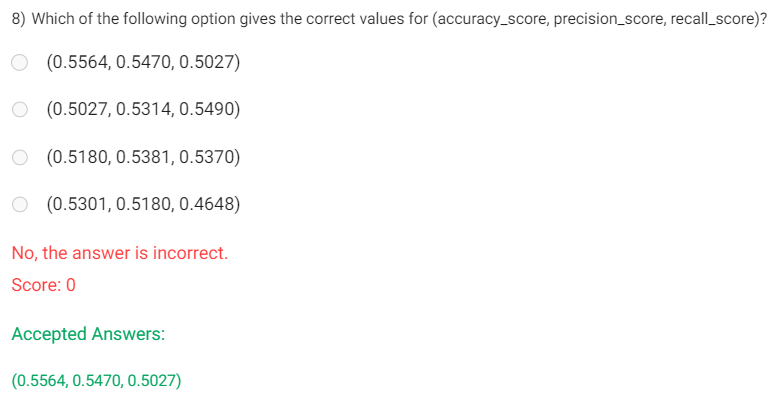

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = pca.predict(X_test_pca)
print('accuracy_score:',accuracy_score(y_test_new,y_pred))
print('precision_score:',precision_score(y_test_new,y_pred))
print('recall_score:',recall_score(y_test_new,y_pred))

accuracy_score: 0.5564304461942258
precision_score: 0.5470588235294118
recall_score: 0.5027027027027027


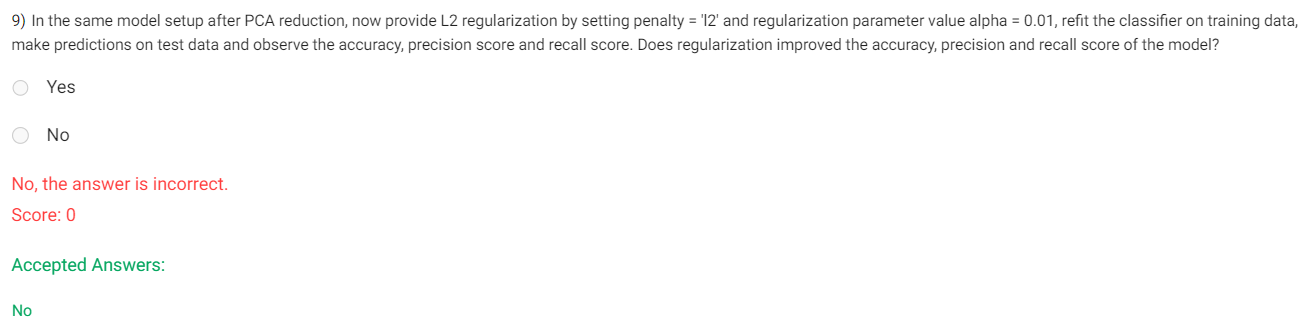

In [15]:
p_reg = Perceptron(eta0=1, penalty='l2', alpha=0.01, random_state=42, max_iter=100,fit_intercept=True,
                 validation_fraction=0.1, shuffle=True)

p_reg.fit(X_train_pca,y_train_new)
y_pred = p_reg.predict(X_test_pca)
print('accuracy_score:',accuracy_score(y_test_new,y_pred))
print('precision_score:',precision_score(y_test_new,y_pred))
print('recall_score:',recall_score(y_test_new,y_pred))

accuracy_score: 0.37270341207349084
precision_score: 0.34831460674157305
recall_score: 0.33513513513513515


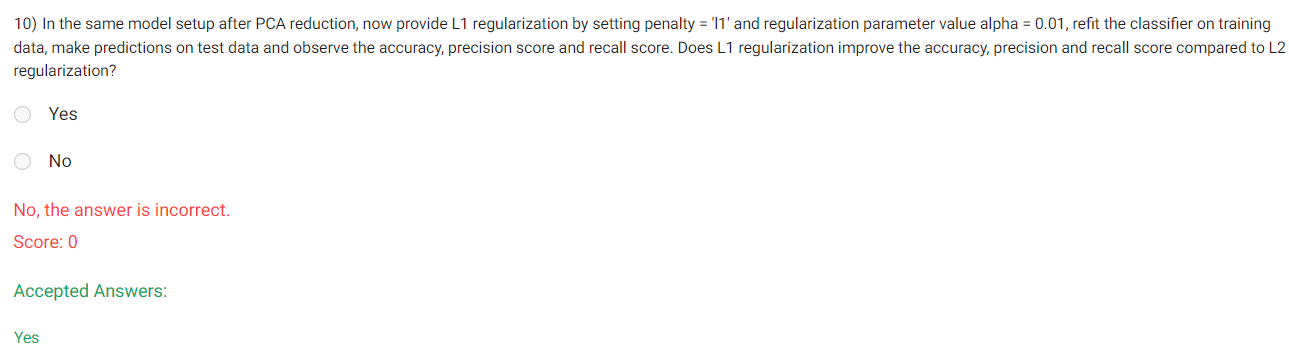

In [16]:
p_reg = Perceptron(eta0=1, penalty='l1', alpha=0.01, random_state=42, max_iter=100,fit_intercept=True,
                 validation_fraction=0.1, shuffle=True)

p_reg.fit(X_train_pca,y_train_new)
y_pred = p_reg.predict(X_test_pca)
print('accuracy_score:',accuracy_score(y_test_new,y_pred))
print('precision_score:',precision_score(y_test_new,y_pred))
print('recall_score:',recall_score(y_test_new,y_pred))

accuracy_score: 0.5459317585301837
precision_score: 0.536144578313253
recall_score: 0.4810810810810811
